In [2]:
import numpy as np
%matplotlib widget
from matplotlib import pyplot as plt
from tqdm import tqdm
import torch as tc
# import gen_comp_plot as gcp
from p_power import *
# from project.blueprints.pyhton.msd_Dmom import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
A = tc.complex(tc.Tensor([[2, 1], [1, 2]]), tc.zeros(2, 2))
U = tc.complex(tc.Tensor([[1, 1], [1, -1]]), tc.zeros(2, 2)) / np.sqrt(2)
y = tc.complex(
    *[tc.normal(mean=tc.zeros((4,2)), std=1) for _ in range(2)]
).to(device)

print(y)

tensor([[-0.4530-2.8854j,  1.0808+1.3444j],
        [ 0.4758+0.6238j,  0.2390+0.1594j],
        [ 0.4498-0.0160j,  0.8066-0.5012j],
        [ 0.4565-1.6900j, -0.4432-0.0444j]])


In [4]:
def lamperti(p, samples=4):

    guesses = tc.zeros(samples * 6, 2, 4, dtype=tc.cfloat)
    thetas = tc.rand(1, 24) * 2 * np.pi
    thetas2 = tc.rand(1,4) * 2 * np.pi
    # import pdb; pdb.set_trace()

    for i in range(4):

        guesses[i, 0, i] = tc.exp( 1j * thetas[0,i])
        guesses[i + 4, 1, i] = tc.exp(1j * thetas[0,i + 4])
        guesses[(4 * (i + 2)):(4 * (i + 3)), 0, i] = tc.exp(1j * thetas[0,(4 * (i + 2)):(4 * (i + 3))])

        for k in range(4):
            guesses[(4 * (i + 2)) + k, 1, k] = tc.exp(1j * thetas2[0,k])

            if k == i: 
                guesses[(4 * (i + 2)) + k, :, :] *= (.5 ** (1/p))

               
    return guesses


In [49]:
p = 1.5
res, vect = p_power(y, p, s_max=100)
# print(res)

res, vect = p_power(y, p, v_init=vect, s_max=100)
matrix= lamperti(p) @ y


final, _ = p_power(matrix, p, s_max=1000)

# print(final.shape)
final_res = tc.max(final)
print(final_res)
print(res)

tensor(3.8377)
tensor([[[4.1190]]])


In [70]:

step = .1
stop = 20
lamp_ps = np.arange(1, stop, step)
# expected, vect = p_power(y, p, s_max=100)

expected = [tc.max(p_power(y, p, s_max=100)[0]) for p in tqdm(lamp_ps)]
matrix = [(lamperti(p)) @ y for p in tqdm(lamp_ps)]

print(np.asarray(matrix).shape)
# final, _ = p_power(matrix, p, s_max=1000)

# p = [int((p-1) / step) for p in lamp_ps]
print(matrix[0].shape)
lamp_norms = [tc.max(p_power(matrix[int((p-1) / step)], p, s_max=100)[0]) for p in tqdm(lamp_ps)]


# print(expected)
ratios = [lamp_norms[int((p-1) / step)] / expected[int((p-1) / step)] for p in tqdm(lamp_ps)]


  0%|          | 0/190 [00:00<?, ?it/s]

100%|██████████| 190/190 [00:00<00:00, 2414.15it/s]


(190, 24, 2, 2)
torch.Size([24, 2, 2])


100%|██████████| 190/190 [00:00<00:00, 255504.25it/s]


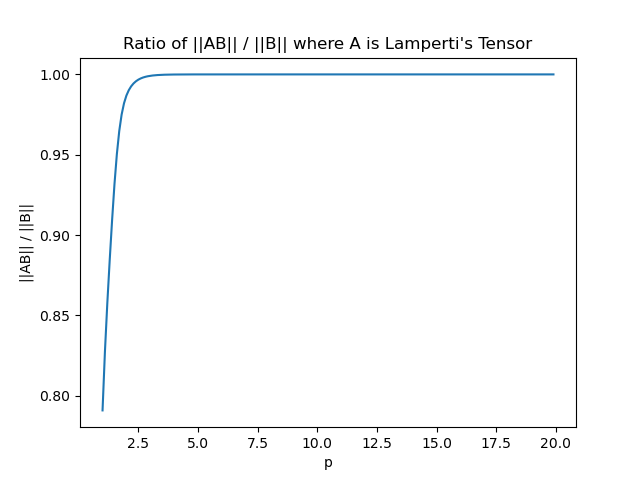

In [71]:

plt.figure()
plt.title('Ratio of ||AB|| / ||B|| where A is Lamperti\'s Tensor')
plt.xlabel('p')
plt.ylabel('||AB|| / ||B||')
plt.plot(lamp_ps, ratios)
plt.show()

In [24]:
for i in range(4):
    print(i)
    

0
1
2
3


In [ ]:

ps = np.arange(1, 5, 0.1)
        
norms = [p_power(y, p, s_max=100)[0] for p in tqdm(ps)]
norms = [n if n==0 else n.item() for n in norms]
figure1 = plt.figure(1)
plt.plot(ps, norms)
plt.show()
qs = 1 - 1 / (1 - ps)
# plt.plot(ps, np.maximum(2**(1/ps), 2**(1/ps)), linestyle='--', linewidth=2)
# plt.show()

  0%|          | 0/40 [00:00<?, ?it/s]c:\Users\jackg\OneDrive - UCB-O365\Documents\!prjs\smoooooothOperatorrr\project\blueprints\pyhton\max_sim_diag.py:27: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ..\aten\src\ATen\native\Copy.cpp:300.)
  converged = tc.zeros(s_max_diag, 1, 1, 1, dtype=tc.cfloat).to(device).bool()
100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


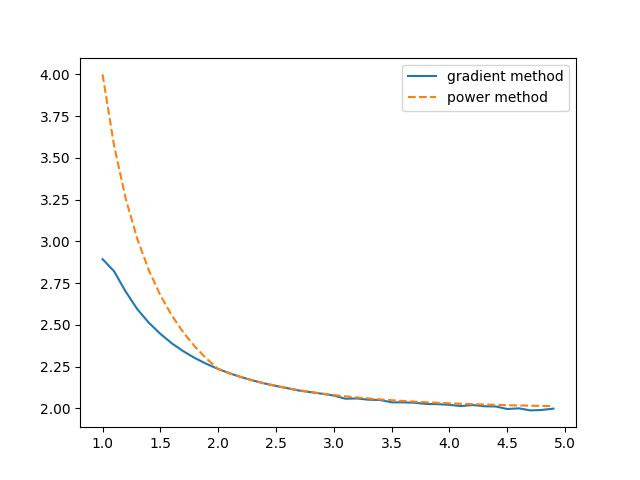

In [ ]:
figure2 = plt.figure()
ps = np.arange(1, 5, 0.1)
norms = [max_sim_diag(A, U, p) for p in tqdm(ps)]
b, a = zip(*norms)
b = [x.item() for x in b]
a = [x.item() for x in a]
plt.plot(ps, b, label='gradient method')
plt.plot(ps, a, label='power method', linestyle='--')
plt.legend()
# qs = 1 - 1 / (1 - ps)
# plt.plot(ps, np.maximum(2**(1/ps), 2**(1/ps)), linestyle='--', linewidth=2)
plt.show()